In [7]:
# Library imports
import geopandas as gpd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import folium

In [8]:
# set location
place = "Newcastle Upon Tyne, United Kingdom"

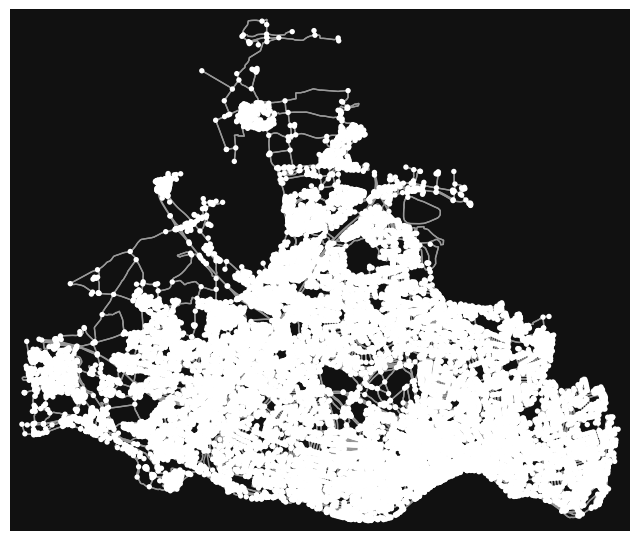

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
# obtain street network and plot
g = ox.graph_from_place(place, network_type='all')
ox.plot_graph(ox.project_graph(g))

In [15]:
# detect communities
communities = nx.community.louvain_communities(g, resolution = 200, seed=None)

C:\Users\b8008458\AppData\Local\Temp\ipykernel_15552\1750342328.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', num_communities)  # Choose a colormap


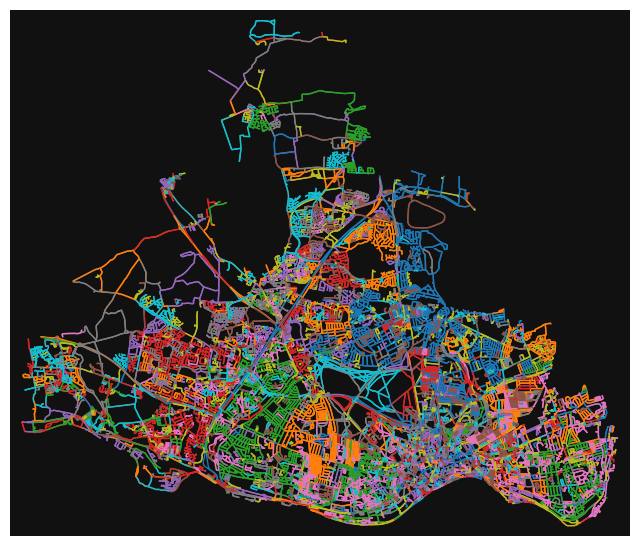

In [16]:
## pretty colours!!

# Create a dictionary to map each node to its community index
node_community = {}
for idx, community in enumerate(communities):
    for node in community:
        node_community[node] = idx

# Create a dictionary to map each edge to its community index
edge_community = {}
for u, v in g.edges():
    if u in node_community and v in node_community:
        edge = (u, v)
        edge_community[edge] = node_community[u]

# Convert community indices to colors
num_communities = len(set(edge_community.values()))
color_map = plt.cm.get_cmap('tab10', num_communities)  # Choose a colormap
edge_colors = [color_map(edge_community[edge]) for edge in g.edges()]

# Draw the graph with edge colors based on the communities
fig, ax = ox.plot_graph(g, node_size=0, edge_color=edge_colors)

# Show the plot
plt.show()

In [ ]:
# Export the edges to a GeoPackage file
#ox.save_graph_geopackage(graph, edge_attributes=['color'], filepath='C:\\Users\\b8008458\\OneDrive - Newcastle University\\2022 to 2023\\PhD\\bikeNetworksEDA\\bikeNetworksEDA\\temp\\edges.gpkg', directed=False)